<a href="https://colab.research.google.com/github/marcocaramanti/MLPNS_MCaramanti/blob/main/W7_NN/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network

Proviamo a costuire un neural network da zero.

In [1]:
import numpy as np
import pylab as pl

In [2]:
X = np.array(
    [[0,0,1],
     [1,1,1],
     [1,0,1],
     [0,1,1]])

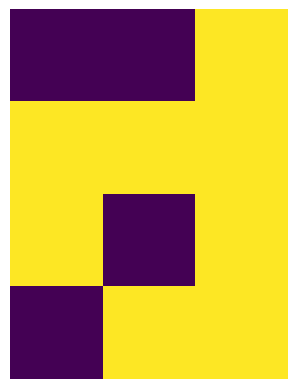

In [3]:
pl.imshow(X);
pl.axis('off');

In [4]:
y = np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [5]:
y.shape

(4, 1)

In [6]:
print("input\n", X)
print("output\n", y)

input
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


# Basic architecture: 1 layer

L'idea è predirre i risultati sulla base della matrice X. Lo facciamo con una architettura base:
- 1 layer
- 3 neuroni
- 4 osservazioni



In [7]:
def sigmoid(x):
  return 1./(1. + np.exp(-x))

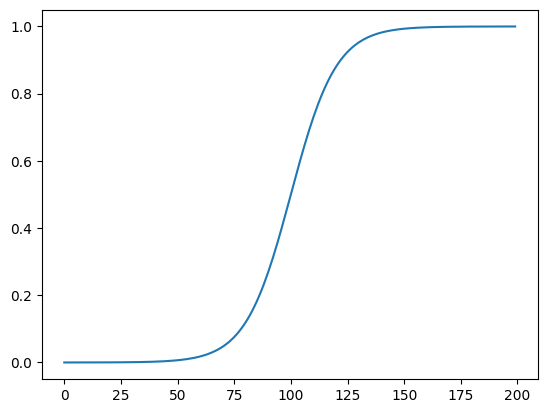

In [8]:
pl.plot(sigmoid(np.arange(-10,10,0.1)))

In [9]:
# Ci servirà la derivata della sigmoide

def dsigmoid(x):
  return x * (1. - x)

In [10]:
# Per la loss function trattiamo ogni datapoint come se fosse un intero dataset,
# cioè ritorniamo un vettore delle distanze.
# Consideriamo la semplice distanza, senza usare né modulo né quadrato

def loss(prediction, target):
  return target - prediction

## Neural network

Partiamo da un punto a caso, poi ottimizziamo i parametri usando una discesa del gradiente in modo da ottimizzare la loss function.

Avremo un processo iterativo. Come decidere quando fermarlo? Qui impostare un criterio di convergenza può essere pericoloso perché il modello è instabile. Allora setteremo semplicemente un numero di iterazioni (numero di epoche).

In [11]:
training = 6000 # Numero di epoche

In [12]:
# Layer of synapses / neurons
#    X    dot    W
# (4 x 3) dot (3 x 1)

np.random.seed(302)

syn0 = 2 * np.random.random((3, 1)) - 1
print(syn0.shape)
print(syn0)

(3, 1)
[[ 0.27256242]
 [ 0.65008468]
 [-0.31671053]]


In [13]:
# Ricopiamo qui questi comandi in modo da inizializzare bene le sinapsi

np.random.seed(302)
syn0 = 2 * np.random.random((3, 1)) - 1

# Abbiamo inizializzato i pesi con una distribuzione uniforme (con una Gaussiana
# avremmo avuto molti punti vicini a zero) scalta nel range (-1, 1)
# In questo modo consentiamo pesi negativi, il cui significato è che una 
# variabile in input è inversamente correlata al risultato

loss_output = []

for iter in range(training):
  inputLayer = X

  # Forward propagation
  # Linear regression (dot product linear algebra solution)
  l1 = np.dot(inputLayer, syn0)
  # Activations
  output = sigmoid(l1)

  # Calculate error
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())

  # Backward propagation
  # Calculate correction
  output_delta = output_error * dsigmoid(output)

  # Apply correction to weights
  syn0 += np.dot(inputLayer.T, output_delta)

print("Output after training\n", output)
print("Output target\n", y)

Output after training
 [[0.01254551]
 [0.98977455]
 [0.99169035]
 [0.0101995 ]]
Output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'Global loss')

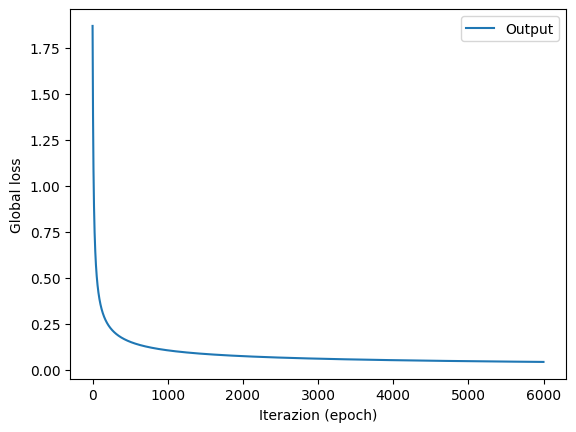

In [14]:
pl.plot(loss_output, label="Output")
pl.legend()
pl.xlabel("Iterazion (epoch)")
pl.ylabel("Global loss")

## Architettura più elaborata

Consideriamo una architettura
$$
4\times 3 \to 3 \times 5 \to 5 \times 1
$$
Significa che il training set possiede 4 esempi. Ogni dato ha tre feature (feature space tridimensionale) quindi l'input layer ha 3 neuroni. L'hidden layer possiede 5 neuroni. Poi abbiamo un neurone di output.

In [15]:
np.random.seed(302)

# Inizializzazione matrici dei pesi
syn0 = 2 * np.random.random((3,5)) - 1
syn1 = 2 * np.random.random((5,1)) - 1

# Per curiosità teniamo traccia della loss function sia dopo l'hidden layer
# sia dopo l'output layer
loss_hidden = []
loss_output = []

for iter in range(training):
  input_layer = X

  # Forward propgatation

  # Hidden layer
  l1 = np.dot(input_layer, syn0)
  hidden = sigmoid(l1)

  # Output layer
  l2 = np.dot(hidden, syn1)
  output = sigmoid(l2)

  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())

  output_delta = output_error * dsigmoid(output)

  # Backpropagation
  hidden_error = np.dot(output_delta, syn1.T)
  loss_hidden.append(np.abs(hidden_error).sum())

  hidden_delta = hidden_error * dsigmoid(hidden)

  syn0 += np.dot(input_layer.T, hidden_delta)
  syn1 += np.dot(hidden.T, output_delta)

print("Output after training\n", output)
print("Output target\n", y)

Output after training
 [[0.00648042]
 [0.99370941]
 [0.99426848]
 [0.00489822]]
Output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'Global loss')

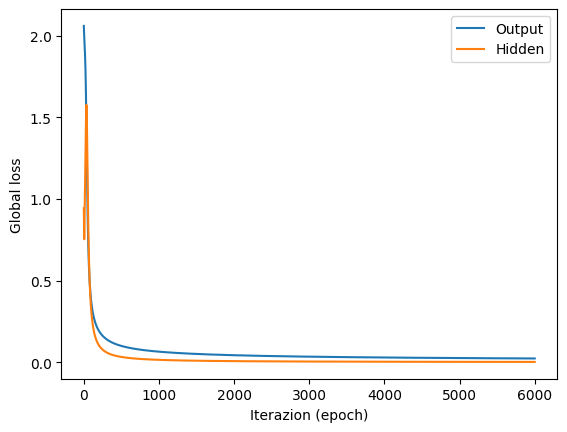

In [16]:
pl.plot(loss_output, label="Output")
pl.plot(loss_hidden, label="Hidden")
pl.legend()
pl.xlabel("Iterazion (epoch)")
pl.ylabel("Global loss")

Ora proviamo a rifare tutto con i pacchetti di Python. Keras è il modello, Tensorflow è il pacchetto che lo contiene assieme ad altri tool.

Un altro pacchetto molto comune è PyTorch.

In [17]:
from tensorflow import keras

In [18]:
# keras.layers contiene tutti i tipi di layer comuni, es. convolutional, 
# multilayer perceptron
# Se voliamo un multilayer perceptron completamente connesso usiamo il layer 
# dense. I parametri sono il numero di neuroni nel nostro layer, il numero
# di feature di input e l'activation function

# Creiamo l'hidden layer
hlayer = keras.layers.Dense(5, input_dim=3, activation="sigmoid")

# Creiamo l'output layer
# Trattiamo il problema come un problema di regressione, quindi prendiamo un
# solo neurone in output. Per classificazione di solito si usano più
# neuroni in output
olayer = keras.layers.Dense(1, activation="linear")

# Creiamo il modello. La rete è un sequential feedforward neural network
# In input prende la lista dei layer
model = keras.Sequential((hlayer, olayer))

# Possiamo vedere un riassunto del modello
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Per fare la compilazione del modello bisogna fare tutte le scelte non ancora
# fatte.
# Ad esempio, la loss function. Scegliamo il mean absolute error
# Le metriche sono quelle per valutare la performance del modello. Usiamo
# accuracy e mae
model.compile(loss="mae", optimizer="adam", metrics=["accuracy", "mae"])

In [23]:
model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5422 - accuracy: 0.5000 - mae: 0.5422
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5418 - accuracy: 0.5000 - mae: 0.5418
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5414 - accuracy: 0.5000 - mae: 0.5414
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.5410 - accuracy: 0.5000 - mae: 0.5410
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5407 - accuracy: 0.5000 - mae: 0.5407
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.5403 - accuracy: 0.5000 - mae: 0.5403
Epoch 7/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.5399 - accuracy: 0.5000 - mae: 0.5399
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.5395 - accuracy: 0.5000 - mae: 0.5395
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.5392 - accuracy: 0.5000 

In [24]:
model.predict(X)

1/1 [==============================] - 0s 222ms/step


array([[-0.00296347],
       [ 0.99165076],
       [ 1.0033889 ],
       [ 0.00102641]], dtype=float32)